In [ ]:
###1. Loading and Preprocessing (1 marks)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
iris_data = load_iris()

In [15]:
df= pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df.shape

(150, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
###2.Clustering Algorithm Implementation (8 marks)

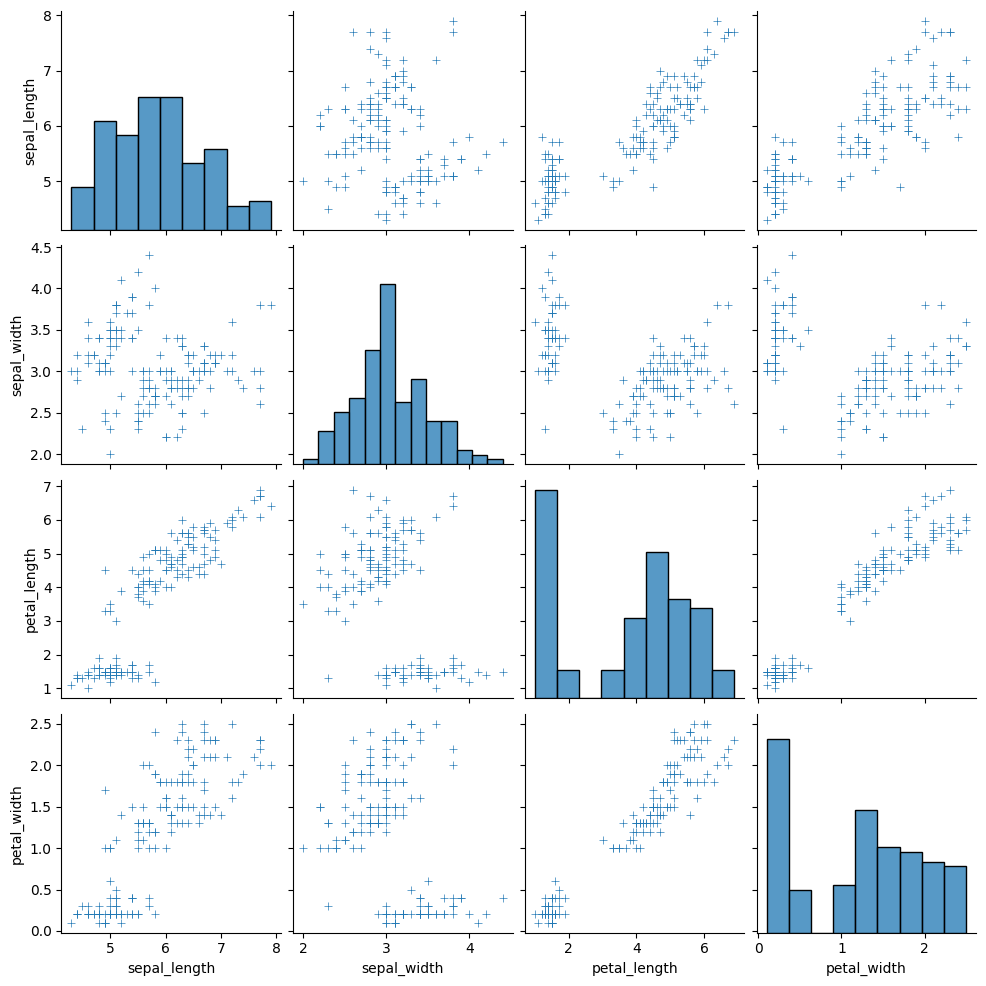

In [19]:
sns.pairplot(df, markers='+')
plt.show()

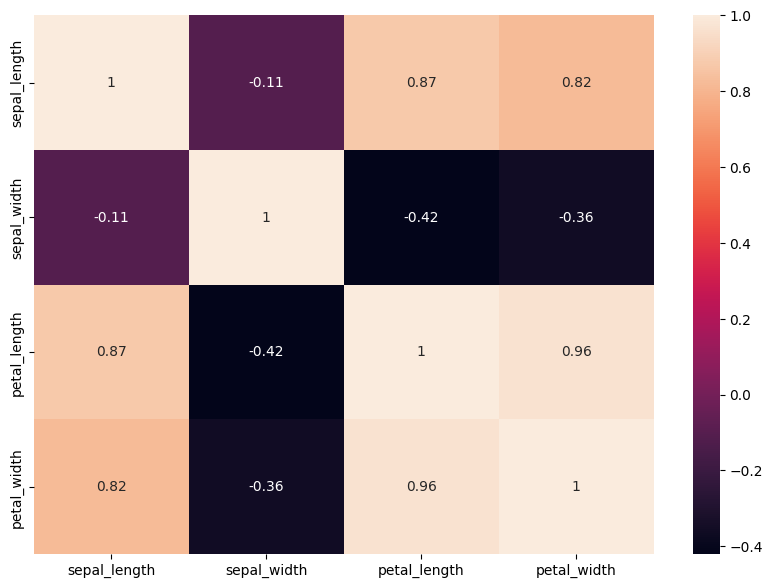

In [23]:
plt.figure(figsize=(10,7))
corr1=df.corr(numeric_only=True)
sns.heatmap(corr1, annot=True)
plt.show()

In [ ]:
###A) KMeans Clustering (4 marks)


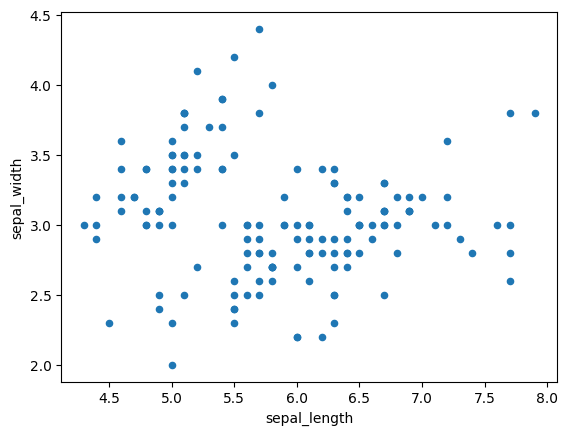

In [26]:
df.plot(kind='scatter', x="sepal_length", y="sepal_width")
plt.show()

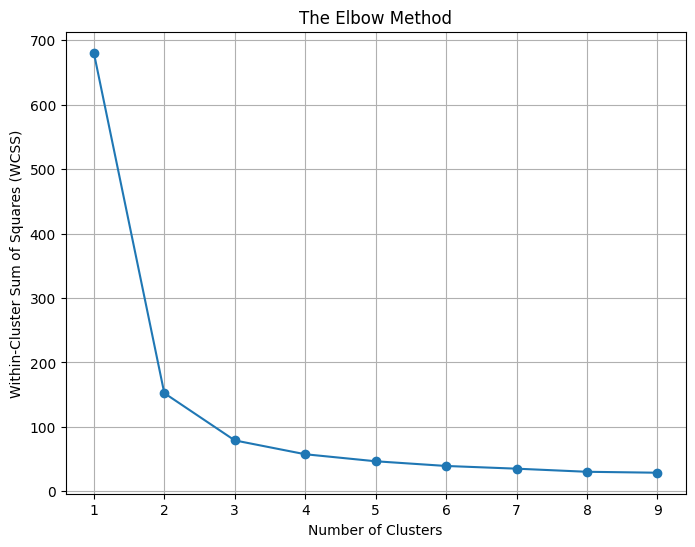

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your data is stored in a DataFrame named 'df'
# Extract the features (numerical columns) for clustering
data = df.select_dtypes(include=['int64', 'float64'])  # Adjust data type selection if needed

# Create an empty list to store within-cluster sum of squares (WCSS)
wss = []

# Loop through a range of cluster numbers (1 to 10)
for num_clusters in range(1, 10):
  # Create a KMeans model with the specified number of clusters
  kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
  
  # Fit the model to the data
  kmeans.fit(data)
  
  # Append the WCSS (inertia) to the wss list
  wss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.plot(range(1, 10), wss, marker='o', linestyle='-')  # Customize plot style
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)  # Add a grid for better readability
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming your data is stored in a DataFrame named 'df'
# Extract the features (numerical columns) for clustering
data = df.select_dtypes(include=['int64', 'float64'])  # Adjust data type selection if needed

# Define a list to store silhouette scores for different cluster numbers
silhouette_scores = []

# Loop through a range of cluster numbers (2 to 10)
for num_clusters in range(2, 10):
  # Create a KMeans model with the specified number of clusters
  kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
  
  # Fit the model to the data
  kmeans.fit(data)
  
  # Calculate the silhouette score for the current number of clusters
  silhouette = silhouette_score(data, kmeans.labels_)
  
  # Append the silhouette score to the list
  silhouette_scores.append(silhouette)
  
  # Print the score (optional)
  print("For cluster:", num_clusters, ", the silhouette score is:", silhouette)  # Cleaner formatting

# Find the cluster number with the highest silhouette score
max_score_index = silhouette_scores.index(max(silhouette_scores))
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adjust for starting index at 2

# Print the optimal number of clusters
print("\nThe optimal number of clusters based on silhouette score:", optimal_clusters)

For cluster: 2 , the silhouette score is: 0.6808136202936816
For cluster: 3 , the silhouette score is: 0.5525919445499757
For cluster: 4 , the silhouette score is: 0.4978256901095472
For cluster: 5 , the silhouette score is: 0.4404740360552381
For cluster: 6 , the silhouette score is: 0.47432918950842595
For cluster: 7 , the silhouette score is: 0.4577092441242155
For cluster: 8 , the silhouette score is: 0.3424995687206621
For cluster: 9 , the silhouette score is: 0.431564759564133

The optimal number of clusters based on silhouette score: 2
